# Unit 5 - Financial Planning

In [31]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


In [32]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [33]:
# Set current amount of crypto assets
my_btc= 1.2
my_eth= 5.3

In [34]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD?format=json"

In [35]:
display(requests.get(btc_url))
display(requests.get(eth_url))

<Response [200]>

<Response [200]>

In [36]:
# Fetch current BTC price
response_data_one = requests.get(btc_url)
response_btc = response_data_one.content
btc_df = response_data_one.json()


# Fetch current ETH price
response_data_two = requests.get(eth_url)
response_eth = response_data_two.content
eth_df = response_data_two.json()


# Fetch current ETH price
response_data_two = requests.get(eth_url)
response_eth = response_data_two.content



# Compute current value of my crpto
my_btc_value = btc_df['data']['1']['quotes']['USD']['price'] * my_btc

my_eth_value = eth_df['data']['1027']['quotes']['USD']['price'] * my_eth


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $28609.20
The current value of your 5.3 ETH is $9416.67


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [37]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [38]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [39]:
# Format current date as ISO format
today = pd.Timestamp("2022-08-05", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today,
).df

display(portfolio_df)

# Reorganize the DataFrame
# Separate ticker data

SPY = portfolio_df[portfolio_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = portfolio_df[portfolio_df['symbol']=='AGG'].drop('symbol', axis=1)

display(SPY)
display(AGG)

# Concatenate the ticker DataFrame
combined_df = pd.concat([SPY, AGG], axis=1, keys=['SPY', 'AGG'])

# Preview DataFrame
display(combined_df)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-08-05 04:00:00+00:00,102.81,102.83,102.52,102.71,4847064,16418,102.711038,AGG
2022-08-05 04:00:00+00:00,409.68,414.15,409.60,413.47,56751151,455450,412.292366,SPY


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-08-05 04:00:00+00:00,409.68,414.15,409.6,413.47,56751151,455450,412.292366


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-08-05 04:00:00+00:00,102.81,102.83,102.52,102.71,4847064,16418,102.711038


SPY                                   \
                             open    high    low   close    volume   
timestamp                                                            
2022-08-05 04:00:00+00:00  409.68  414.15  409.6  413.47  56751151   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-08-05 04:00:00+00:00      455450  412.292366  102.81  102.83  102.52   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-08-05 04:00:00+00:00  102.71  4847064       16418  102.711038

In [40]:
# Pick AGG and SPY close prices

spy_close_price = float(combined_df["SPY"]["close"])
agg_close_price = float(combined_df["AGG"]["close"])



# Print AGG and SPY close prices

print(f"Current SPY closing price: ${spy_close_price}")
print(f"Current AGG closing price: ${agg_close_price}")


Current SPY closing price: $413.47
Current AGG closing price: $102.71


In [41]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20673.50
The current value of your 200 AGG shares is $20542.00


### Savings Health Analysis

In [42]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
assets = {'amount': [my_btc_value + my_eth_value, my_spy_value + my_agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(assets, index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,38025.869
shares,41215.500


array([<AxesSubplot:ylabel='total assest'>], dtype=object)

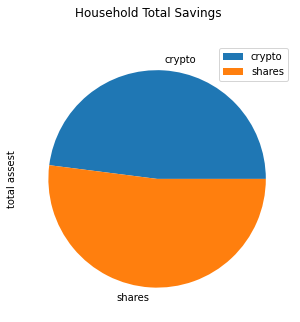

In [43]:
# Plot savings pie chart
df_savings.plot.pie(ylabel= 'total assest', title="Household Total Savings", subplots=True, figsize =(10, 5))

In [44]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_btc_value + my_eth_value + my_spy_value + my_agg_value

x = emergency_fund - total_savings

# Validate saving health
if emergency_fund == total_savings:
    print("Congratulations! you have reached your financial goal!")
elif emergency_fund > total_savings:
    print(f'You are {x} amount of dollars from reaching your financial goals.')
elif emergency_fund < total_savings:
    print("Congratulations! you have enough money in this fund!")

Congratulations! you have enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [45]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-08-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-08-01', tz='America/New_York').isoformat()

In [46]:
# Get 5 years' worth of historical data for SPY and AGG
historical_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df


# Reorganize the DataFrame
# Separate ticker data
SPY = historical_df[historical_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = historical_df[historical_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
historical_df = pd.concat([SPY, AGG], axis=1, keys=['SPY','AGG'])

# Display sample data
historical_df.head(10)

SPY                                      \
                             open    high      low   close     volume   
timestamp                                                               
2017-08-01 04:00:00+00:00  247.45  247.50  246.716  247.32   55050401   
2017-08-02 04:00:00+00:00  247.47  247.60  246.370  247.44   47211216   
2017-08-03 04:00:00+00:00  247.31  247.34  246.640  246.96   40855997   
2017-08-04 04:00:00+00:00  247.52  247.79  246.970  247.41   60191838   
2017-08-07 04:00:00+00:00  247.50  247.87  247.370  247.87   31995021   
2017-08-08 04:00:00+00:00  247.49  248.91  246.830  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.060  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.700  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.750  244.12   74869947   
2017-08-14 04:00:00+00:00  245.55  246.79  245.550  246.54   73291919   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2017-08-01 04:00:00+00:00      151132  247.199252  109.38  109.7200  109.3600   
2017-08-02 04:00:00+00:00      178076  247.109454  109.71  109.7700  109.6400   
2017-08-03 04:00:00+00:00      143604  247.075390  109.77  109.9400  109.7400   
2017-08-04 04:00:00+00:00      175911  247.329155  109.70  109.7200  109.5350   
2017-08-07 04:00:00+00:00      100111  247.668698  109.69  109.7200  109.6066   
2017-08-08 04:00:00+00:00      192921  247.739709  109.67  109.6900  109.5000   
2017-08-09 04:00:00+00:00      223650  246.791421  109.87  109.8700  109.6600   
2017-08-10 04:00:00+00:00      424321  245.027847  109.70  109.8500  109.6700   
2017-08-11 04:00:00+00:00      278786  244.222867  109.75  109.9400  109.6800   
2017-08-14 04:00:00+00:00      227671  246.332178  109.84  109.8969  109.7400   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-08-01 04:00:00+00:00  109.72  2338876       10476  109.649411  
2017-08-02 04:00:00+00:00  109.64  2253372        8484  109.700965  
2017-08-03 04:00:00+00:00  109.86  1485193        8740  109.830663  
2017-08-04 04:00:00+00:00  109.68  2300875       10411  109.656104  
2017-08-07 04:00:00+00:00  109.67  2359826        7755  109.674876  
2017-08-08 04:00:00+00:00  109.57  2570876       12663  109.577636  
2017-08-09 04:00:00+00:00  109.67  2308932       11031  109.771749  
2017-08-10 04:00:00+00:00  109.78  2004163       12437  109.776611  
2017-08-11 04:00:00+00:00  109.87  1913253       10113  109.860974  
2017-08-14 04:00:00+00:00  109.82  2294261       10792  109.825015

In [47]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirty_year = MCSimulation(
    portfolio_data = historical_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_thirty_year.portfolio_data.head()

SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2017-08-01 04:00:00+00:00  247.45  247.50  246.716  247.32  55050401   
2017-08-02 04:00:00+00:00  247.47  247.60  246.370  247.44  47211216   
2017-08-03 04:00:00+00:00  247.31  247.34  246.640  246.96  40855997   
2017-08-04 04:00:00+00:00  247.52  247.79  246.970  247.41  60191838   
2017-08-07 04:00:00+00:00  247.50  247.87  247.370  247.87  31995021   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-01 04:00:00+00:00      151132  247.199252          NaN  109.38   
2017-08-02 04:00:00+00:00      178076  247.109454     0.000485  109.71   
2017-08-03 04:00:00+00:00      143604  247.075390    -0.001940  109.77   
2017-08-04 04:00:00+00:00      175911  247.329155     0.001822  109.70   
2017-08-07 04:00:00+00:00      100111  247.668698     0.001859  109.69   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2017-08-01 04:00:00+00:00  109.72  109.3600  109.72  2338876       10476   
2017-08-02 04:00:00+00:00  109.77  109.6400  109.64  2253372        8484   
2017-08-03 04:00:00+00:00  109.94  109.7400  109.86  1485193        8740   
2017-08-04 04:00:00+00:00  109.72  109.5350  109.68  2300875       10411   
2017-08-07 04:00:00+00:00  109.72  109.6066  109.67  2359826        7755   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-01 04:00:00+00:00  109.649411          NaN  
2017-08-02 04:00:00+00:00  109.700965    -0.000729  
2017-08-03 04:00:00+00:00  109.830663     0.002007  
2017-08-04 04:00:00+00:00  109.656104    -0.001638  
2017-08-07 04:00:00+00:00  109.674876    -0.000091

In [53]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gerar\OneDrive\Desktop\Unit-5-Homework-Assingment\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016848,1.001023,1.006723,0.993143,1.000676,1.003857,1.005909,1.007617,0.998247,1.001050,...,0.992073,0.993827,0.996264,1.003295,1.010726,1.000579,1.002056,0.999988,0.986484,1.002945
2,1.020613,0.993180,1.013145,0.990966,1.006189,1.016205,0.996057,1.012874,0.993516,1.001562,...,0.977957,1.001961,1.007778,1.004336,1.010230,0.993451,0.995652,0.999378,0.981833,1.000943
3,1.014358,0.991127,1.003915,0.989774,1.008693,1.016567,0.990718,1.017984,1.008596,1.007012,...,0.973854,0.985768,1.018724,1.019320,1.017896,0.984924,0.996631,1.008774,0.976374,1.003509
4,1.023023,0.993754,0.998248,0.988104,1.022603,1.002978,0.978152,1.018388,0.996444,1.016700,...,0.974052,0.998318,1.018846,1.027493,1.015797,0.980092,1.004443,1.016978,0.980645,0.995578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.105877,13.089609,3.927015,5.657429,9.192248,1.626597,4.521271,5.282332,6.663275,5.305991,...,11.622519,14.465475,2.237686,5.837732,1.965874,5.382725,5.772481,5.726845,4.762942,2.227108
7557,4.083316,13.065785,3.935930,5.696062,9.111547,1.627244,4.521459,5.296733,6.703074,5.317257,...,11.634892,14.533254,2.224257,5.902239,1.989789,5.372305,5.717271,5.633300,4.726181,2.232232
7558,4.086447,12.973332,3.879075,5.758206,9.165257,1.622556,4.559729,5.277583,6.766636,5.237339,...,11.700599,14.486033,2.233694,5.866613,2.001810,5.391134,5.699283,5.545941,4.741128,2.237758
7559,4.035773,12.962010,3.889728,5.746502,9.139253,1.635312,4.561528,5.297885,6.757686,5.250817,...,11.774267,14.468693,2.232847,5.875085,1.979496,5.386269,5.680130,5.612464,4.769940,2.237093


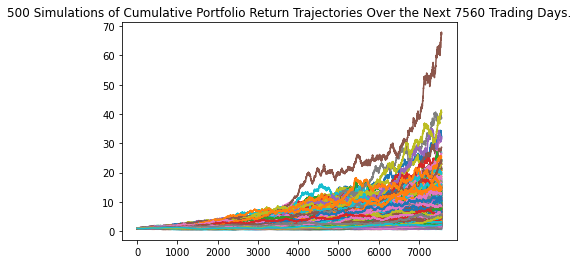

In [54]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

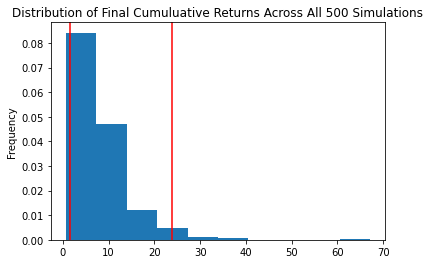

In [55]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              8.126066
std               6.315217
min               0.614329
25%               4.180782
50%               6.439983
75%              10.102074
max              67.156328
95% CI Lower      1.632790
95% CI Upper     23.776911
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [57]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $32655.79 and $475538.23


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [48]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_five_year = MCSimulation(
    portfolio_data = historical_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_five_year.portfolio_data.head()

SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2017-08-01 04:00:00+00:00  247.45  247.50  246.716  247.32  55050401   
2017-08-02 04:00:00+00:00  247.47  247.60  246.370  247.44  47211216   
2017-08-03 04:00:00+00:00  247.31  247.34  246.640  246.96  40855997   
2017-08-04 04:00:00+00:00  247.52  247.79  246.970  247.41  60191838   
2017-08-07 04:00:00+00:00  247.50  247.87  247.370  247.87  31995021   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-01 04:00:00+00:00      151132  247.199252          NaN  109.38   
2017-08-02 04:00:00+00:00      178076  247.109454     0.000485  109.71   
2017-08-03 04:00:00+00:00      143604  247.075390    -0.001940  109.77   
2017-08-04 04:00:00+00:00      175911  247.329155     0.001822  109.70   
2017-08-07 04:00:00+00:00      100111  247.668698     0.001859  109.69   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2017-08-01 04:00:00+00:00  109.72  109.3600  109.72  2338876       10476   
2017-08-02 04:00:00+00:00  109.77  109.6400  109.64  2253372        8484   
2017-08-03 04:00:00+00:00  109.94  109.7400  109.86  1485193        8740   
2017-08-04 04:00:00+00:00  109.72  109.5350  109.68  2300875       10411   
2017-08-07 04:00:00+00:00  109.72  109.6066  109.67  2359826        7755   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-01 04:00:00+00:00  109.649411          NaN  
2017-08-02 04:00:00+00:00  109.700965    -0.000729  
2017-08-03 04:00:00+00:00  109.830663     0.002007  
2017-08-04 04:00:00+00:00  109.656104    -0.001638  
2017-08-07 04:00:00+00:00  109.674876    -0.000091

In [49]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gerar\OneDrive\Desktop\Unit-5-Homework-Assingment\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008926,0.986401,0.995136,1.003318,1.004506,0.998564,1.021874,0.986605,0.995621,1.007665,...,0.998427,1.006518,1.003850,0.995262,1.004385,1.001702,1.011126,0.994726,0.987556,1.011536
2,1.004132,0.982466,0.996068,1.004862,1.010371,1.002490,1.005405,0.988577,0.993796,1.005869,...,0.989786,1.000761,1.019450,0.989933,1.001755,0.995925,1.013652,1.006828,0.985484,1.003396
3,1.005156,0.989974,0.992594,1.003752,1.005585,1.015548,1.000763,1.004894,0.990370,0.999683,...,0.990792,0.996385,1.019428,0.986583,1.000039,0.985063,1.008685,1.015729,0.994540,1.004523
4,1.021089,0.988020,0.997415,1.018673,1.013595,1.015422,1.009930,1.016717,0.990433,0.992843,...,0.977253,0.977973,1.028117,0.981834,1.001783,1.002700,1.001750,1.019824,1.001941,1.010490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.781606,1.099317,1.615444,1.087878,1.430632,1.393029,1.407229,1.927678,0.672267,1.933273,...,1.660287,1.089028,2.419645,1.029986,1.416122,2.474090,1.272822,0.922736,2.024059,1.207831
1257,1.776388,1.105829,1.607285,1.085703,1.418014,1.391059,1.396027,1.940238,0.671204,1.946733,...,1.668144,1.086784,2.397072,1.032345,1.429810,2.496399,1.255079,0.917198,2.014192,1.215914
1258,1.766767,1.092281,1.613240,1.073843,1.410162,1.378084,1.388119,1.948581,0.673494,1.919444,...,1.672451,1.081004,2.376433,1.039398,1.423724,2.509808,1.262838,0.910545,1.997061,1.215025
1259,1.769945,1.102123,1.601696,1.064844,1.403450,1.380436,1.408450,1.946454,0.668042,1.922332,...,1.666922,1.065392,2.389765,1.033072,1.443825,2.533893,1.260910,0.905366,1.998996,1.212311


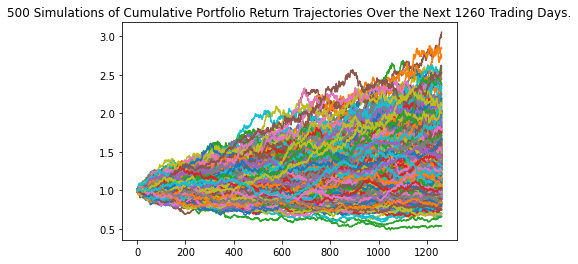

In [50]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

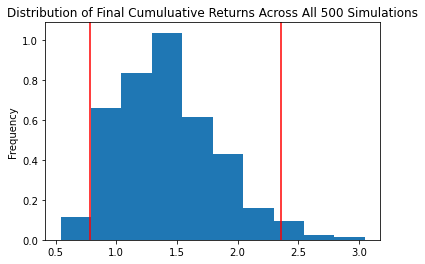

In [51]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.420409
std               0.414548
min               0.540106
25%               1.116305
50%               1.383666
75%               1.653724
max               3.049432
95% CI Lower      0.783775
95% CI Upper      2.357570
Name: 1260, dtype: float64


In [59]:
# Double the initial investment
initial_investment_two = 40000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment_two,2)
ci_upper_five = round(tbl[9]*initial_investment_two,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_two} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")


There is a 95% chance that an initial investment of $40000 in the portfolio over the next 5 years will end within in the range of $31350.99 and $94302.79


### Ten Years Retirement Option

In [60]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_ten_year = MCSimulation(
    portfolio_data = historical_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Print the simulation input data
MC_ten_year.portfolio_data.head()

SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2017-08-01 04:00:00+00:00  247.45  247.50  246.716  247.32  55050401   
2017-08-02 04:00:00+00:00  247.47  247.60  246.370  247.44  47211216   
2017-08-03 04:00:00+00:00  247.31  247.34  246.640  246.96  40855997   
2017-08-04 04:00:00+00:00  247.52  247.79  246.970  247.41  60191838   
2017-08-07 04:00:00+00:00  247.50  247.87  247.370  247.87  31995021   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-01 04:00:00+00:00      151132  247.199252          NaN  109.38   
2017-08-02 04:00:00+00:00      178076  247.109454     0.000485  109.71   
2017-08-03 04:00:00+00:00      143604  247.075390    -0.001940  109.77   
2017-08-04 04:00:00+00:00      175911  247.329155     0.001822  109.70   
2017-08-07 04:00:00+00:00      100111  247.668698     0.001859  109.69   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2017-08-01 04:00:00+00:00  109.72  109.3600  109.72  2338876       10476   
2017-08-02 04:00:00+00:00  109.77  109.6400  109.64  2253372        8484   
2017-08-03 04:00:00+00:00  109.94  109.7400  109.86  1485193        8740   
2017-08-04 04:00:00+00:00  109.72  109.5350  109.68  2300875       10411   
2017-08-07 04:00:00+00:00  109.72  109.6066  109.67  2359826        7755   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-01 04:00:00+00:00  109.649411          NaN  
2017-08-02 04:00:00+00:00  109.700965    -0.000729  
2017-08-03 04:00:00+00:00  109.830663     0.002007  
2017-08-04 04:00:00+00:00  109.656104    -0.001638  
2017-08-07 04:00:00+00:00  109.674876    -0.000091

In [61]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gerar\OneDrive\Desktop\Unit-5-Homework-Assingment\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991655,1.007922,1.017918,1.016526,0.996456,1.003394,1.010482,1.003949,1.024081,1.018284,...,1.003099,0.991138,0.978356,1.011990,1.004796,0.998333,1.010852,1.010574,0.982051,1.004993
2,0.980720,1.005288,1.027807,1.022093,0.996173,0.991551,0.993154,0.986163,1.035640,1.004692,...,1.007679,0.982514,0.964339,1.007745,0.994905,0.991266,1.000835,1.009621,0.974830,1.024743
3,0.961730,0.985649,1.015003,1.033204,0.981158,0.985333,0.987555,0.986428,1.037336,1.003870,...,1.011645,1.001279,0.963386,0.990762,1.005199,0.985812,1.006351,0.997780,0.986147,1.012952
4,0.968810,0.978674,1.004172,1.024655,0.966075,0.988241,0.976804,0.998759,1.057369,0.994145,...,1.004659,1.010539,0.974414,0.991794,1.001730,1.006135,0.994735,0.998233,0.971394,1.007397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.561250,2.133036,1.996237,2.533216,5.761702,2.704890,1.580039,2.708638,2.772664,4.107107,...,2.974466,1.635383,1.702376,3.631215,1.458144,2.039002,1.182507,4.352579,2.814495,1.489782
2517,0.567258,2.123872,1.997611,2.530411,5.762013,2.677072,1.564595,2.710457,2.776071,4.116473,...,2.965261,1.622145,1.708621,3.559151,1.456396,2.006566,1.173758,4.361074,2.823009,1.463058
2518,0.563872,2.109867,2.001653,2.529607,5.719812,2.712501,1.543471,2.749365,2.799615,4.137245,...,2.958590,1.626656,1.711986,3.596306,1.463176,2.018469,1.185280,4.419918,2.853169,1.454030
2519,0.552853,2.111849,2.002520,2.526966,5.727865,2.728059,1.527949,2.745353,2.743811,4.222402,...,2.995136,1.633601,1.699513,3.569426,1.458220,2.064851,1.192852,4.438008,2.780191,1.435062


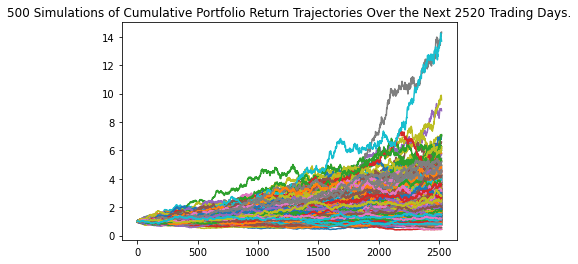

In [62]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

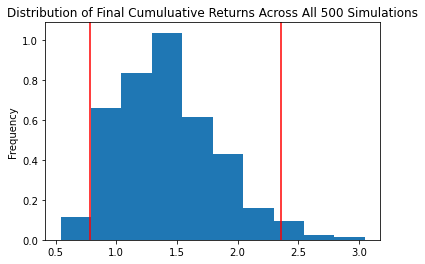

In [63]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [64]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.527829
std               1.460243
min               0.432594
25%               1.571272
50%               2.278913
75%               3.084235
max              14.320730
95% CI Lower      0.804192
95% CI Upper      5.907087
Name: 2520, dtype: float64


In [65]:
# Set initial investment with a 80/20 weighted portfolio
initial_investment_three = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment_three,2)
ci_upper_ten = round(tbl[9]*initial_investment_three,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_three} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $16083.83 and $118141.74
